In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Predicted age based on fur color
#Squirrel location vs observed foraging
#Squirrel location vs approach behavior

data = pd.read_csv("2018_Central_Park_Squirrel_Census_-_Squirrel_Data_20250418.csv")
print("Hello World!")

# Strip any leading/trailing spaces from column names (just in case...)
data.columns = data.columns.str.strip()

#print(data.columns)  # Check to confirm exact names


Hello World!


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


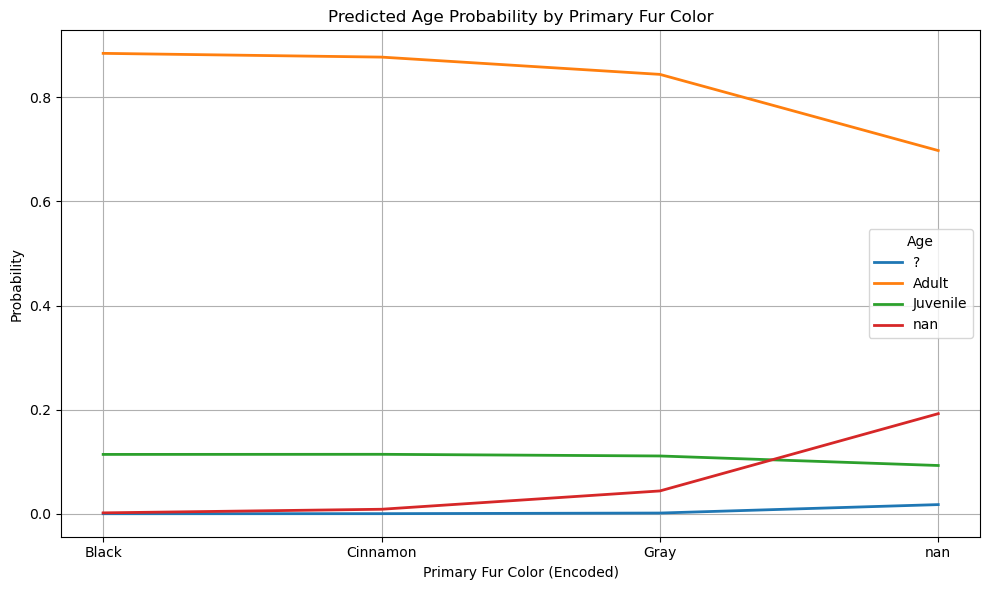

In [39]:
##Does elevation impact the secondary fur color of squirrels? (Logistic regression) (predict squirle 2nd hair color)
import pandas as pd


# Encode Primary Fur Color to integers
fur_le = LabelEncoder()
data['Fur_Color_Label'] = fur_le.fit_transform(data['Primary Fur Color'])

age_le = LabelEncoder()
data['Age_Label'] = age_le.fit_transform(data['Age'])

x = data[['Fur_Color_Label']].values
y = data[['Age_Label']].values

# Standardize
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Logistic Regression
model = LogisticRegression().fit(x_train, y_train)

# Evaluate
y_pred = model.predict(x_test)
#print(classification_report(y_test, y_pred, target_names=age_le.classes_, zero_division=0))

x_range = np.arange(data['Fur_Color_Label'].min(), data['Fur_Color_Label'].max() + 1).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range) #standardize
probs = model.predict_proba(x_range_scaled) #add a probability for the age (based on fur color)

plt.figure(figsize=(10, 6))
for i, age in enumerate(age_le.classes_): #loop through the ages (Adult vs Juvenile)
    plt.plot(x_range, probs[:, i], label=age, linewidth=2)

plt.title("Predicted Age Probability by Primary Fur Color")
plt.xlabel("Primary Fur Color (Encoded)")
plt.ylabel("Probability")

# Add tick labels using fur color names
plt.xticks(x_range.flatten(), fur_le.inverse_transform(x_range.flatten()))
plt.legend(title='Age')
plt.grid(True)
plt.tight_layout()
plt.show()


Foraging_Int
0    1588
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


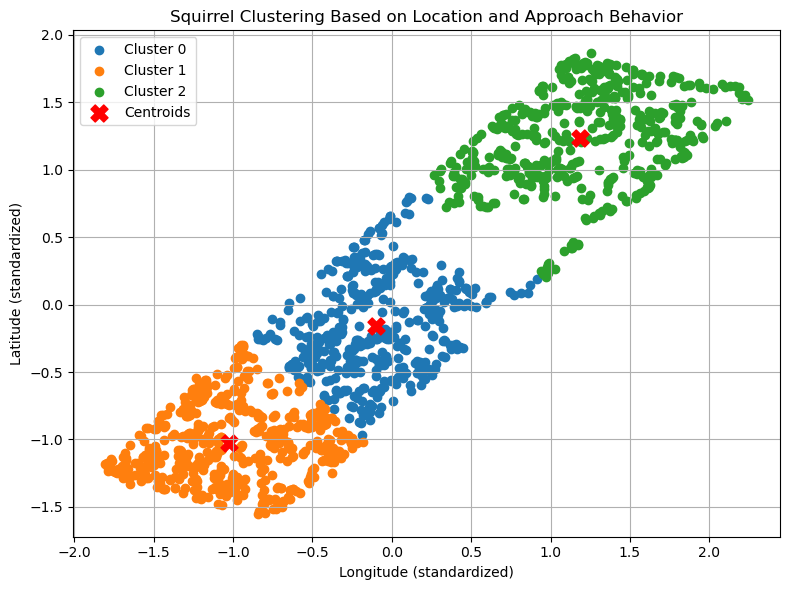

In [40]:
# Filter for squirrels with location and approach info
data = data.dropna(subset=['Foraging', 'X', 'Y'])
data = data[data['Foraging'] != 1] #limit approaches to only approaching squirrels


# Features: latitude (X), longitude (Y)
data['Foraging_Int'] = data['Foraging'].astype(int)
features = data[['X', 'Y', 'Foraging_Int']]

print(features['Foraging_Int'].value_counts())

# Standardize features
x_std = StandardScaler().fit_transform(features)

# Set number of clusters
k = 3 #can change for different results
km = KMeans(n_clusters=k, random_state=42).fit(x_std)

# Get centroids and labels
centroids = km.cluster_centers_
labels = km.labels_

# Plot
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster = x_std[labels == i]
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=150, c='red', label='Centroids')

# Labels and formatting
plt.xlabel("Longitude (standardized)")
plt.ylabel("Latitude (standardized)")
plt.title("Squirrel Clustering Based on Location and Approach Behavior")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


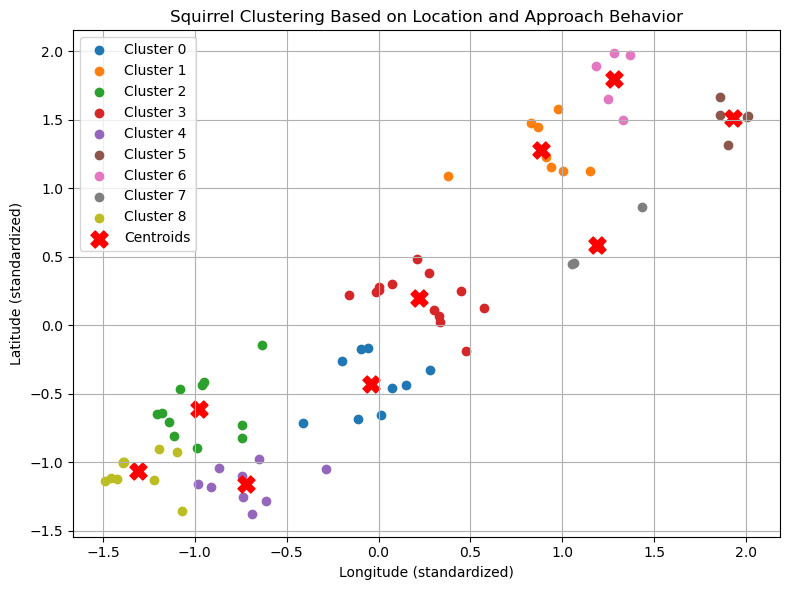

In [41]:
#Location

# Filter for squirrels with location and approach info
data = data.dropna(subset=['Approaches', 'X', 'Y'])
data = data[data['Approaches'] != 0] #limit approaches to only approaching squirrels

# Features: latitude (X), longitude (Y)
data['Approach_Int'] = data['Approaches'].astype(int)

features = data[['X', 'Y', 'Approach_Int']]


# Standardize features
x_std = StandardScaler().fit_transform(features)

# Set number of clusters
k = 9 #can change for different results
km = KMeans(n_clusters=k, random_state=42).fit(x_std)

# Get centroids and labels
centroids = km.cluster_centers_
labels = km.labels_

# Plot
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster = x_std[labels == i]
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=150, c='red', label='Centroids')

# Labels and formatting
plt.xlabel("Longitude (standardized)")
plt.ylabel("Latitude (standardized)")
plt.title("Squirrel Clustering Based on Location and Approach Behavior")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


